<center><span style="font-size:3em"><b>Neural Networks</b></span></center>

***
<center><span style="font-size:2em"><b>Project 1</b></span></center>
<br>
<center><span style="font-size:2em"><b>Classification of EMNIST Dataset using PCA and Persistent Homology</b></span></center>
<br>
<center><span style="font-size:1.5em"><b>Van Minh Nguyen  &   Tsz Chung Ho</b></span></center>

***

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Persistent-Homology" data-toc-modified-id="Persistent-Homology-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Persistent Homology</a></span></li><li><span><a href="#Filtrations" data-toc-modified-id="Filtrations-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Filtrations</a></span></li></ul></li><li><span><a href="#Data-Processing-Pipeline" data-toc-modified-id="Data-Processing-Pipeline-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Processing Pipeline</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Mode-of-loading-data" data-toc-modified-id="Mode-of-loading-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Mode of loading data</a></span></li><li><span><a href="#Running-Baseline-Test-and-Confusion-Matrix" data-toc-modified-id="Running-Baseline-Test-and-Confusion-Matrix-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Running Baseline Test and Confusion Matrix</a></span></li><li><span><a href="#Alternative-to-By_Merge-Dataset" data-toc-modified-id="Alternative-to-By_Merge-Dataset-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Alternative to By_Merge Dataset</a></span></li><li><span><a href="#Balanced-Dataset-for-NewMerge" data-toc-modified-id="Balanced-Dataset-for-NewMerge-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Balanced Dataset for NewMerge</a></span></li><li><span><a href="#Topological-Data-Analysis-(TDA)---Persistent-Homology" data-toc-modified-id="Topological-Data-Analysis-(TDA)---Persistent-Homology-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Topological Data Analysis (TDA) - Persistent Homology</a></span></li><li><span><a href="#Principal-Component-Analysis-(PCA)" data-toc-modified-id="Principal-Component-Analysis-(PCA)-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Principal Component Analysis (PCA)</a></span></li></ul></li><li><span><a href="#Neural-Network-tuning" data-toc-modified-id="Neural-Network-tuning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Neural Network tuning</a></span><ul class="toc-item"><li><span><a href="#Baseline" data-toc-modified-id="Baseline-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Baseline</a></span></li><li><span><a href="#Adding-layers" data-toc-modified-id="Adding-layers-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Adding layers</a></span></li><li><span><a href="#Regularization" data-toc-modified-id="Regularization-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Regularization</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Problem Statement
***
We classify the EMNIST dataset using a Feedforward Neural Network. 
The EMNIST dataset consists of images of handwritten digits as well as alphabetical letters. Each image is represented as a 28x28 pixel grayscaled image, just like images in the original MNIST dataset. From the article of the author who created EMNIST [(Cohen et al., 2017)](https://arxiv.org/abs/1702.05373v1), the datasets has 3 main versions with sizes as follow:

|Version|No. Classes|Training|Testing|Total|
|--|--|--|--|--|
|**ByClass**|62|697,932|116,323|814,255|
|**ByMerge**|47|697,932|116,323|814,255|
|**Balanced**|47|112,800|18,800|131,600|

EMNIST dataset is very large and each versions contains some problems that will affect the Neural Network training (which we will discusslater). The main focus of this project is to preprocess the data, tackle each issue arise from each version of the EMNIST dataset and examine options for dimension reduction. We apply Persistent Homology to our dataset to extract topological features, and then we apply PCA to our extracted features to further reduce the dimension for processing. 

## Overview

We give an overview of how <b>Persistent Homology</b> works.



A major problem in Topology is classifying spaces up to certain properties, like homeomorphism or homotopy equivalence. 
We can informally think of two spaces X and Y as being homotopy equivalent if we can deform one into the other with operations like bending and shrinking, but not splitting. 

A major tool from Algebraic Topology for classifying spaces is <b>Homology</b>. It is a procedure for attaching a sequence of algebraic structures such as groups or vector spaces to a topological space X.
In the case of groups, we have for each topological space X a sequence $\{H_0 (X), H_1 (X), H_2 (X), ...\}$ called the <b>homology groups</b> of X. 

A fundamental result is that if two spaces are homotopy equivalent, then their homology groups are isomorphic. In our case, we are interested in the rank of each homology group, which is called the n-th <b>Betti number</b>, denoted as $H_n$ for our purposes. The 0-th Betti number of a space $H_0$ gives the number of connected components of the space, while $H_1$ gives the number of holes. 

For example, the digit "8" has one connected component and two holes, so $H_0 = 1$ and $H_1 = 2$. For the letter "i",  $H_0 = 2$ and $H_1 = 0$. While we can determine these things from looking at the objects, Homology gives us a tool to explicitly compute them (as well as holes in higher dimensions).


## Persistent Homology

We can intuitively state the Betti numbers given a letter or digit, but how do we compute them for image data? 

We can informally treat the images as a set of point clouds, and build a <b>simplicial complex</b> approximation for each of them, from which we can compute the Betti numbers. 

This raises a few questions. How do we construct the simplicial complex? Given a simplicial complex constructed for a point cloud, how can we be sure that it closely resembles the digit/letter? Do we have any robustness at all regarding noise?

This is where <b>Persistent Homology</b> comes in.
We somehow create a filtration of simplicial complexes; i.e. a nested sequence of simplicial complexes for a point cloud. This process will involve a time-like parameter. As we change the parameter, we see how the number of connected components and holes change. 

Running a filtration process for the point cloud gives us a <b>persistence diagram</b>. Each point on the diagram represents a component or hole (color coded accordingly), where the x-coordinate represents the time (parameter value) of birth and the y-coordinate represents the time of death (when the component gets absorbed into another one or when a hole gets filled).

The persistence diagram tells us which components/holes last the longest, and we take those to represent the true shape of the data.

There is a result, known as the <b>Stability theorem</b>, which gives us robustness: if the filtration input is perturbed a bit, then the resulting persistence diagram will change slightly. To be a bit more precise, there is a metric on the space of persistence diagrams known as <b>bottleneck distance</b>, and a small change in input will result in a small change in the bottleneck distance of the new diagram.

This allows us to extract features from the persistence diagram for use in our learning algorithms.

## Filtrations
We describe some ways to generate filtrations for a point cloud and for a grayscale image. 

A common way to generate a filtration for a point cloud is to have a parameter $\epsilon \geq 0$ and form balls of radius $\epsilon$ around each point. As we increase the parameter, we form simplexes for sets of points which are equidistant within $\epsilon$. This process generates a nested sequence of simplicial complexes (in this case they are known as Vietoris-Rips complexes); i.e. a filtration, from which we can extract persistence diagrams.

Another way to generate a filtration, this time considering image data, is using grayscale values. In this context, instead of using simplicial complexes, we use cubical complexes since image data have a natural grid structure. The parameter in this case is the grayscale value, and we consider the map from a pixel to its grayscale value. We look at the sublevel sets of this mapping. We get a nested sequence of cubical complexes as we decrease the grayscale values for the sublevel sets. This is known as grayscale filtration.

There are many other ways to generate filtrations; we will be using the height and radial filtrations with different direction and center parameters, as described in [Garin & Tauzin](https://arxiv.org/abs/1910.08345).

They determined that those filtrations gave the best features for the MNIST dataset in terms of correlation, so we apply those to EMNIST.

# Data Processing Pipeline
***
We took the EMNIST ByClass files - the largest and also the original EMNIST dataset, merged the letter and digit images (based on certain criteria), and then took an even (same) number of samples for each class to obtain a dataset of 98163 images for training. We also took our computing resources into consideration when deciding our training size.

For each image, we applied the following pipeline:

1.   Binarize the images so that pixels with grayscale values < 40% will be mapped to 1, and 0 otherwise.
2.   Apply radial and height filtrations with different parameters to the binarized image.
3.   Obtain the persistence diagrams from the results of each filtration.
4.   Scale each diagram, and then apply different methods to extract amplitude values for each Betti number to use as features.

For each image, we extracted 476 topological features for processing. 
We then further extracted a smaller number of features using PCA and compared the results of applying each set of features to the classifier.

We had memory problems when we tried to load the whole dataset for processing, so we ran it in batches and concatenated the results to a file each time. There was a stray NaN value in one of the rows of the processed data which negatively impacted our classifiers, so we removed that row. 

# Preprocessing
***

In [1]:
import pandas as pd
# we will be using panda for dataframe since it has better performance
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l1_l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.metrics import accuracy_score
from IPython.display import clear_output

Since the dataset size is huge, there's a performance benefit in using pandas for preprocessing.  
All tests for preprocesing data will be used on `emnist-balanced-*.csv` dataset then will be scaled up for bigger dataset.

## Mode of loading data

The original EMNIST ByMerge dataset has the size of 1.3GB, which is a huge burden to the system resource when loaded into Python (some pandas and numpy headroom, inefficient use of datatype by default from Python,...). Finding an optimized way to load the data without losing any information become a crucial task before any preprocessing or training models.  
Below, as an example, we loaded the Balanced EMNIST dataset as an example for data loading efficiency if we use default settings and then try on a new loading method. Later we'll be using the new method to load the full ByClass dataset

In [2]:
train_dt = pd.read_csv("./dataset/emnist-balanced-train.csv", header=None)
mem_dt = train_dt.memory_usage().sum() / 1024**2
print("Memory usage of", "train_dt", "is", round(mem_dt, 2), "MB")

Memory usage of train_dt is 675.57 MB


This is just a test load with the smallest dataset of emnist (Balanced train dataset, 219 MB in file size), but the dataframe size blew up to 675.6 MB, this is due to data is being stored at default int64 (-9223372036854775808 to 9223372036854775807), which is a waste of memory while all of the pixel data is 0 to 255 and classification mapping is 0 to 61. Thus storing the dataframe with datatype of uint8 (0 to 255) is the more sensible choice.

In [3]:
train_uint8 = pd.read_csv(
    "./dataset/emnist-balanced-train.csv", header=None, dtype=np.uint8)
mem_uint8 = train_uint8.memory_usage().sum() / 1024**2
print("Memory usage of", "train_uint8", "is", round(mem_uint8, 2), "MB")
print("Percentage memory saved: {:.2f}%".format((mem_dt-mem_uint8)/mem_dt*100))

Memory usage of train_uint8 is 84.45 MB
Percentage memory saved: 87.50%


In [4]:
# Free memory
del train_dt, train_uint8, mem_dt, mem_uint8

In [2]:
train = pd.read_csv("./dataset/emnist-byclass-train.csv",
                    header=None, dtype=np.uint8)
test = pd.read_csv("./dataset/emnist-byclass-test.csv",
                   header=None, dtype=np.uint8)
map_char = pd.read_csv("./dataset/emnist-byclass-mapping.txt", delimiter=' ',
                       index_col=0, header=None, squeeze=True, dtype=np.uint8)

## Running Baseline Test and Confusion Matrix

In [2]:
# Using keras construct a fully connected feed forward neural network
def build_model(layers, acf="relu", loss_func="categorical_crossentropy", l1_lambda=0, l2_lambda=0, opt="adam"):
    model = Sequential()
    regularizer = l1_l2(l1=l1_lambda, l2=l2_lambda)
    for i in range(len(layers)):
        if i == 0:
            pass
        elif i == 1:
            model.add(Dense(layers[i], input_shape=(
                layers[0],), activation=acf, kernel_regularizer=regularizer))
        else:
            model.add(Dense(layers[i], activation=acf,
                            kernel_regularizer=regularizer))
    model.compile(loss=loss_func, optimizer=opt, metrics=["accuracy"])
    return model

In [7]:
model = build_model([784, 256, 62], "sigmoid")

In [8]:
trainX = train[train.columns[1:]].to_numpy()
trainY = train[0].to_numpy()
testX = test[test.columns[1:]].to_numpy()
testY = test[0].to_numpy()
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [9]:
H = model.fit(trainX, trainY, validation_data=(
    testX, testY), epochs=30, batch_size=512)

Epoch 1/30
1364/1364 [==============================] - 6s 5ms/step - loss: 1.2315 - accuracy: 0.6677 - val_loss: 0.9114 - val_accuracy: 0.7305
Epoch 2/30
1364/1364 [==============================] - 6s 4ms/step - loss: 0.8652 - accuracy: 0.7429 - val_loss: 0.8134 - val_accuracy: 0.7538
Epoch 3/30
1364/1364 [==============================] - 6s 4ms/step - loss: 0.7889 - accuracy: 0.7601 - val_loss: 0.7481 - val_accuracy: 0.7693
Epoch 4/30
1364/1364 [==============================] - 6s 4ms/step - loss: 0.7476 - accuracy: 0.7682 - val_loss: 0.7280 - val_accuracy: 0.7726
Epoch 5/30
1364/1364 [==============================] - 6s 5ms/step - loss: 0.7200 - accuracy: 0.7746 - val_loss: 0.7126 - val_accuracy: 0.7764
Epoch 6/30
1364/1364 [==============================] - 6s 4ms/step - loss: 0.7016 - accuracy: 0.7780 - val_loss: 0.6913 - val_accuracy: 0.7822
Epoch 7/30
1364/1364 [==============================] - 6s 4ms/step - loss: 0.6879 - accuracy: 0.7817 - val_loss: 0.6891 - val_accuracy:

In [10]:
predictY = model.predict(testX)
predictY = lb.inverse_transform(predictY)

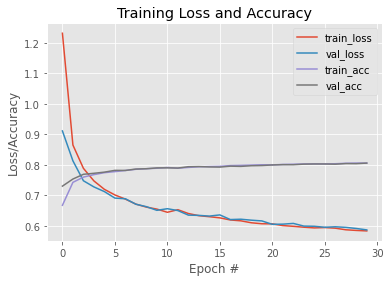

In [11]:
epoch = 30
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epoch), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epoch), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epoch), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epoch), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [12]:
confusion = sklearn.metrics.confusion_matrix(
    lb.inverse_transform(testY), predictY)

In [3]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('binary')

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(
        accuracy, misclass))
    plt.show()

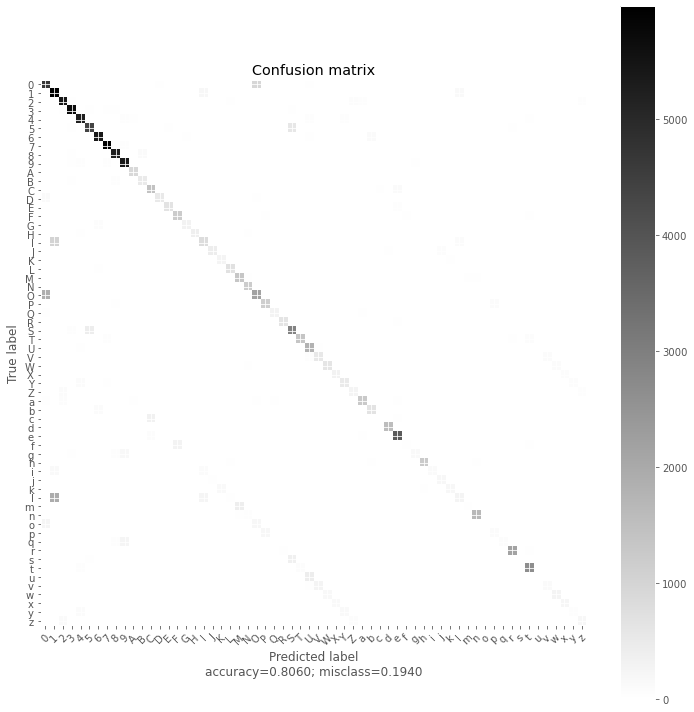

In [13]:
plot_confusion_matrix(confusion, [chr(i) for i in map_char])

In [14]:
print("######## CLASSIFICATION RESULTS FOR TRAINING DATA ########")
print(classification_report(lb.inverse_transform(trainY), lb.inverse_transform(
    model.predict(trainX)), target_names=[chr(i) for i in map_char]))
print("######## CLASSIFICATION RESULTS FOR TESTING DATA ########")
print(classification_report(lb.inverse_transform(testY),
                            predictY, target_names=[chr(i) for i in map_char]))

######## CLASSIFICATION RESULTS FOR TRAINING DATA ########


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.66      0.80      0.72     34585
           1       0.65      0.93      0.77     38374
           2       0.90      0.92      0.91     34203
           3       0.93      0.96      0.94     35143
           4       0.90      0.94      0.92     33535
           5       0.87      0.85      0.86     31416
           6       0.94      0.95      0.94     34232
           7       0.95      0.97      0.96     35754
           8       0.90      0.92      0.91     33946
           9       0.90      0.95      0.92     33847
           A       0.82      0.87      0.84      6407
           B       0.65      0.75      0.70      3878
           C       0.72      0.83      0.77     10094
           D       0.84      0.67      0.74      4562
           E       0.87      0.82      0.84      4934
           F       0.74      0.84      0.79      9182
           G       0.75      0.73      0.74      2517
           H       0.89    

The main problem for EMNIST dataset (not in MNIST) is the numbers of training samples for each classes are not equal, thus created a heavy bias towards the class with more data (digits class and letter e for example) while also decreasing the classification accuracy of the other catergories. [(Johnson & Khoshgoftaar, 2019)](https://link.springer.com/article/10.1186/s40537-019-0192-5)  
In addition, imbalanced testing set can skew the result of the confusion matrix, from the classification data report, some letters has a really good precision (self-classified) result (for example, E, T, e, r, t, ...) but the confusion matrix doesn't reflect that. Thus, a balanced testing set would also give us some benefit here.

In [5]:
def balance_dataset(dataset, colgroup):
    dataset_balanced = dataset.copy()
    sample_size = dataset_balanced[colgroup].value_counts().min()
    if type(colgroup) == int:
        group = dataset_balanced.columns[colgroup]
    else:
        group = colgroup
    dataset_balanced = dataset_balanced.groupby(
        group).sample(sample_size, random_state=1)
    dataset_remain = dataset.drop(dataset_balanced.index)
    return dataset_balanced, dataset_remain

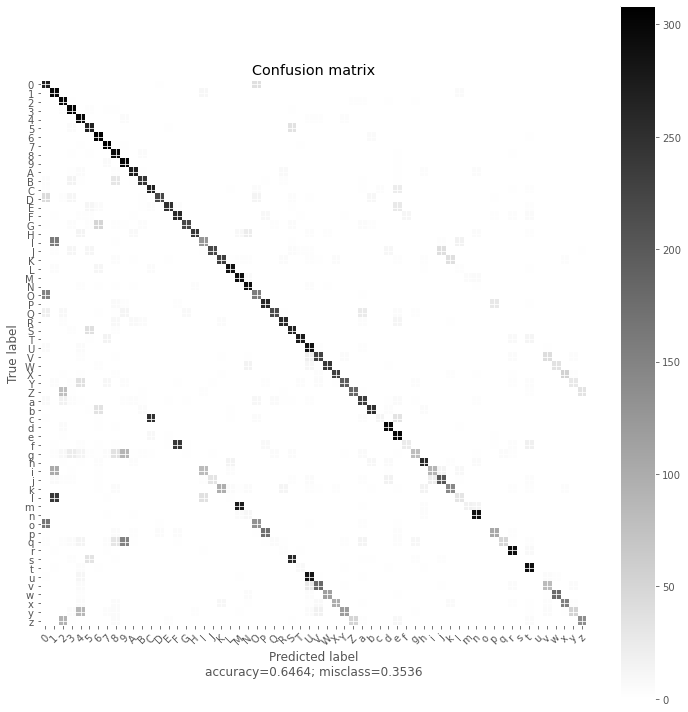

In [16]:
test_balanced, _ = balance_dataset(test, 0)
testX_balanced = test_balanced[test_balanced.columns[1:]].to_numpy()
testY_balanced = test_balanced[0].to_numpy()
predictY_balanced = model.predict(testX_balanced)
predictY_balanced = lb.inverse_transform(predictY_balanced)
confusion_balanced = sklearn.metrics.confusion_matrix(
    testY_balanced, predictY_balanced)
plot_confusion_matrix(confusion_balanced, [chr(i) for i in map_char])

Notice the blurry lines that is parallel to the main diagonal on both upper and lower triangle, this is caused by certain number, uppercase, lowercase letter tuples looks similar in handwriting. To counter this problem and (hopefully) increase the accuracy, we will be merging these similar looking character into 1 class.

Note: We'll not balance the training dataset for now since after merging we'll definitely needs to balanced again which leads to more data loss.

## Alternative to By_Merge Dataset

Motivation of this step came from the variant on the EMNIST dataset that merges certain classes, creating a 47-class classification task. The merged classes, as suggested by the NIST, are for the letters C, I, J, K, L, M, O, P, S, U,
V, W, X, Y and Z.  
However, further investigation (as well as from the confusion matrix analysis above) showed that there are more characters that are similar and needs to be merged. Following are examples.

In [6]:
def draw_emnist(image_iloc):
    image_vector = train[train.columns[1:]].iloc[image_iloc].to_numpy(
        dtype=np.uint8)
    image = image_vector.reshape((28, 28))
    image = np.rot90(np.fliplr(image))
    plt.title(chr(map_char[train[0].iloc[image_iloc]]))
    plt.imshow(image, cmap="gray")


def get_indices_chr(char):
    indices = train.index[train[0] == map_char.index[map_char == ord(char)][0]]
    return indices

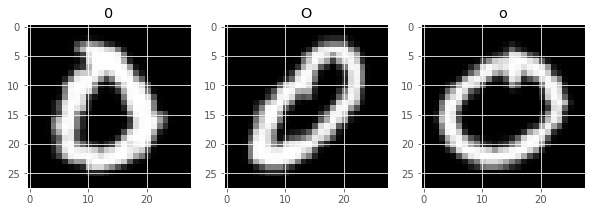

In [18]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 3, 1)
draw_emnist(get_indices_chr("0")[1])
fig.add_subplot(1, 3, 2)
draw_emnist(get_indices_chr("O")[90])
fig.add_subplot(1, 3, 3)
draw_emnist(get_indices_chr("o")[90])

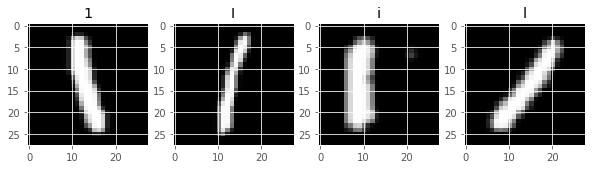

In [19]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 4, 1)
draw_emnist(get_indices_chr("1")[1])
fig.add_subplot(1, 4, 2)
draw_emnist(get_indices_chr("I")[90])
fig.add_subplot(1, 4, 3)
draw_emnist(get_indices_chr("i")[90])
fig.add_subplot(1, 4, 4)
draw_emnist(get_indices_chr("l")[90])

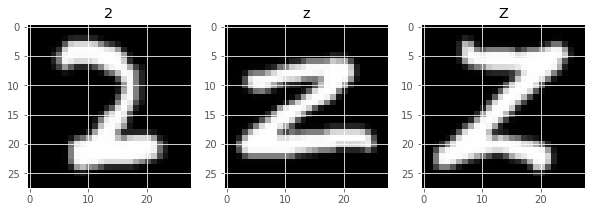

In [20]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 3, 1)
draw_emnist(get_indices_chr("2")[40])
fig.add_subplot(1, 3, 2)
draw_emnist(get_indices_chr("z")[1])
fig.add_subplot(1, 3, 3)
draw_emnist(get_indices_chr("Z")[6])

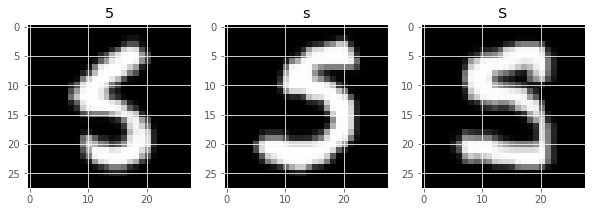

In [21]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 3, 1)
draw_emnist(get_indices_chr("5")[80])
fig.add_subplot(1, 3, 2)
draw_emnist(get_indices_chr("s")[1])
fig.add_subplot(1, 3, 3)
draw_emnist(get_indices_chr("S")[6])

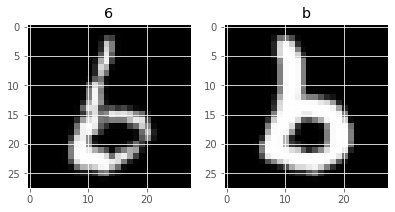

In [22]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 3, 1)
draw_emnist(get_indices_chr("6")[8])
fig.add_subplot(1, 3, 2)
draw_emnist(get_indices_chr("b")[1])

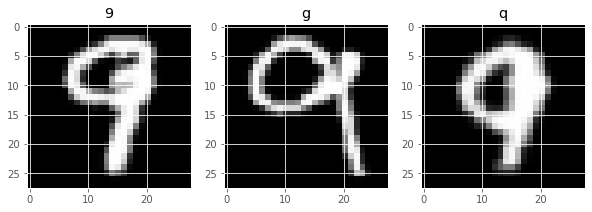

In [23]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 3, 1)
draw_emnist(get_indices_chr("9")[90])
fig.add_subplot(1, 3, 2)
draw_emnist(get_indices_chr("g")[1])
fig.add_subplot(1, 3, 3)
draw_emnist(get_indices_chr("q")[90])

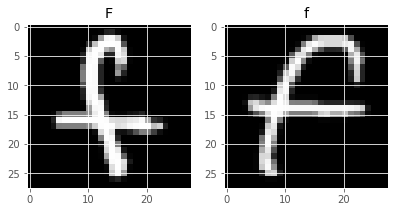

In [24]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 3, 1)
draw_emnist(get_indices_chr("F")[90])
fig.add_subplot(1, 3, 2)
draw_emnist(get_indices_chr("f")[1])

Here we propose a new merge method:

$$\begin{array}
&  & 1 &   &   &   &   & 0 &   & 5 &   &   &   &   &   & 2 & 6  & 9 \\
 C & I & J & K & L & M & O & P & S & U & V & W & X & Y & Z &&&F\\
 c & i & j & k &   & m & o & p & s & u & v & w & x & y & z & b  & g&f\\
   & l &   &   &   &   &   &   &   &   &   &   &   &   &   &&q
\end{array}$$

In [7]:
def rep_merge(s):
    s = s.replace([fchar("c")], [fchar("C")])
    s = s.replace([fchar("j")], [fchar("J")])
    s = s.replace([fchar("k")], [fchar("K")])
    s = s.replace([fchar("m")], [fchar("M")])
    s = s.replace([fchar("p")], [fchar("P")])
    s = s.replace([fchar("u")], [fchar("U")])
    s = s.replace([fchar("v")], [fchar("V")])
    s = s.replace([fchar("w")], [fchar("W")])
    s = s.replace([fchar("x")], [fchar("X")])
    s = s.replace([fchar("y")], [fchar("Y")])
    s = s.replace([fchar("I"), fchar("i"), fchar("l")], [fchar("1")]*3)
    s = s.replace([fchar("o"), fchar("O")], [fchar("0")]*2)
    s = s.replace([fchar("s"), fchar("S")], [fchar("5")]*2)
    s = s.replace([fchar("z"), fchar("Z")], [fchar("2")]*2)
    s = s.replace([fchar("b")], [fchar("6")])
    s = s.replace([fchar("g"), fchar("q")], [fchar("9")]*2)
    s = s.replace([fchar("f")], [fchar("F")])
    return s

In [8]:
train_merge = train[0]
test_merge = test[0]


def fchar(x): return map_char.index[map_char == ord(x)][0]


train_merge = rep_merge(train_merge)
test_merge = rep_merge(test_merge)

In [10]:
lb2 = LabelBinarizer()
train_merge = lb2.fit_transform(train_merge)
test_merge = lb2.transform(test_merge)

In [27]:
model_merge = build_model([784, 256, 39], "sigmoid")
H_merge = model_merge.fit(trainX, train_merge, validation_data=(
    testX, test_merge), epochs=30, batch_size=512)

Epoch 1/30
1364/1364 [==============================] - 6s 4ms/step - loss: 0.8310 - accuracy: 0.7915 - val_loss: 0.5569 - val_accuracy: 0.8545
Epoch 2/30
1364/1364 [==============================] - 6s 4ms/step - loss: 0.5287 - accuracy: 0.8594 - val_loss: 0.4901 - val_accuracy: 0.8688
Epoch 3/30
1364/1364 [==============================] - 6s 4ms/step - loss: 0.4660 - accuracy: 0.8742 - val_loss: 0.4368 - val_accuracy: 0.8819
Epoch 4/30
1364/1364 [==============================] - 6s 4ms/step - loss: 0.4318 - accuracy: 0.8826 - val_loss: 0.4175 - val_accuracy: 0.8863
Epoch 5/30
1364/1364 [==============================] - 6s 4ms/step - loss: 0.4069 - accuracy: 0.8891 - val_loss: 0.4044 - val_accuracy: 0.8891
Epoch 6/30
1364/1364 [==============================] - 6s 4ms/step - loss: 0.3994 - accuracy: 0.8908 - val_loss: 0.3890 - val_accuracy: 0.8933
Epoch 7/30
1364/1364 [==============================] - 6s 4ms/step - loss: 0.3845 - accuracy: 0.8941 - val_loss: 0.3807 - val_accuracy:

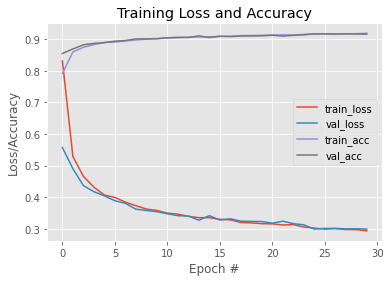

In [28]:
epoch = 30
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epoch), H_merge.history["loss"], label="train_loss")
plt.plot(np.arange(0, epoch), H_merge.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epoch), H_merge.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epoch), H_merge.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

Just by merging, the accuracy in prediction increased from 80% to 91%. Of course, this is not the ideal way to classify EMNIST, but we can further investigate issue by do a local classification for each of the merged class in the future. Now we will create a new data column for the dataset

In [11]:
train_merged = train.copy()
train_merged.insert(1, "Merge", lb2.inverse_transform(train_merge))
test_merged = test.copy()
test_merged.insert(1, "Merge", lb2.inverse_transform(test_merge))
map_char_merged = map_char[np.unique(lb2.inverse_transform(train_merge))]

In [14]:
train_merged.to_csv(
    "./dataset/emnist-newmerge-train.csv", header=False, index=False)
test_merged.to_csv(
    "./dataset/emnist-newmerge-test.csv", header=False, index=False)
map_char_merged.to_csv(
    "./dataset/emnist-newmerge-mapping.txt", header=False)

## Balanced Dataset for NewMerge

In [30]:
trainX_merged = train_merged[train_merged.columns[2:]].to_numpy()
trainY_merged = train_merged["Merge"].to_numpy()
testX_merged = test_merged[test_merged.columns[2:]].to_numpy()
testY_merged = test_merged["Merge"].to_numpy()
print("######## CLASSIFICATION RESULTS FOR TRAINING DATA ########")
print(classification_report(trainY_merged, lb2.inverse_transform(
    model_merge.predict(trainX_merged)), target_names=[chr(i) for i in map_char_merged]))
print("######## CLASSIFICATION RESULTS FOR TESTING DATA ########")
print(classification_report(testY_merged, lb2.inverse_transform(
    model_merge.predict(testX_merged)), target_names=[chr(i) for i in map_char_merged]))

######## CLASSIFICATION RESULTS FOR TRAINING DATA ########
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     62317
           1       0.97      0.98      0.97     68363
           2       0.95      0.94      0.95     39629
           3       0.95      0.95      0.95     35143
           4       0.92      0.92      0.92     33535
           5       0.96      0.95      0.95     54879
           6       0.94      0.96      0.95     39391
           7       0.96      0.96      0.96     35754
           8       0.91      0.92      0.91     33946
           9       0.92      0.92      0.92     40528
           A       0.82      0.85      0.84      6407
           B       0.75      0.65      0.70      3878
           C       0.87      0.89      0.88     12948
           D       0.83      0.64      0.72      4562
           E       0.90      0.79      0.84      4934
           F       0.90      0.86      0.88     11743
           G       0.7

As discussed in part 2, an imbalanced dataset is not ideal for unbiased classification and the model would prefer to classify the class with more data.

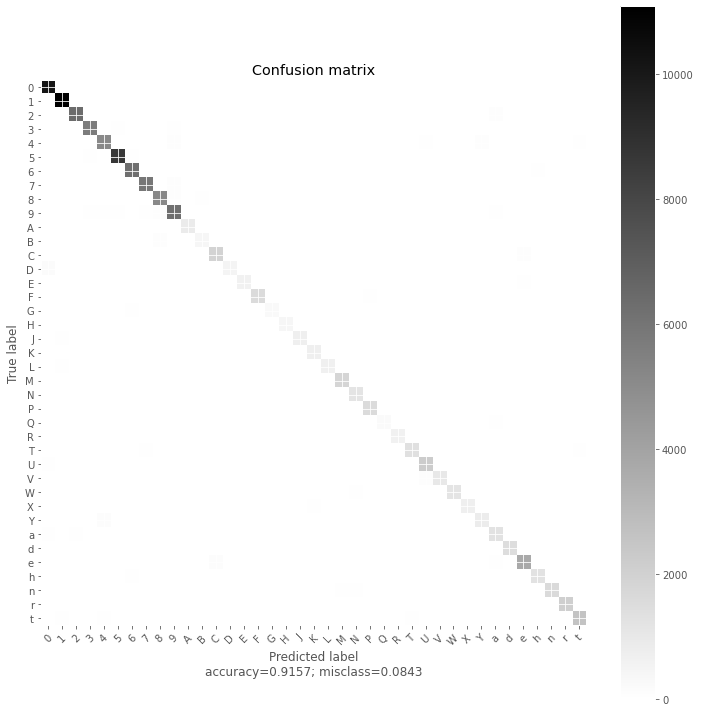

In [31]:
confusion_merged = sklearn.metrics.confusion_matrix(
    testY_merged, lb2.inverse_transform(model_merge.predict(testX_merged)))
plot_confusion_matrix(confusion_merged, [chr(i) for i in map_char_merged])

Balanced confusion matrix for a better view of performance

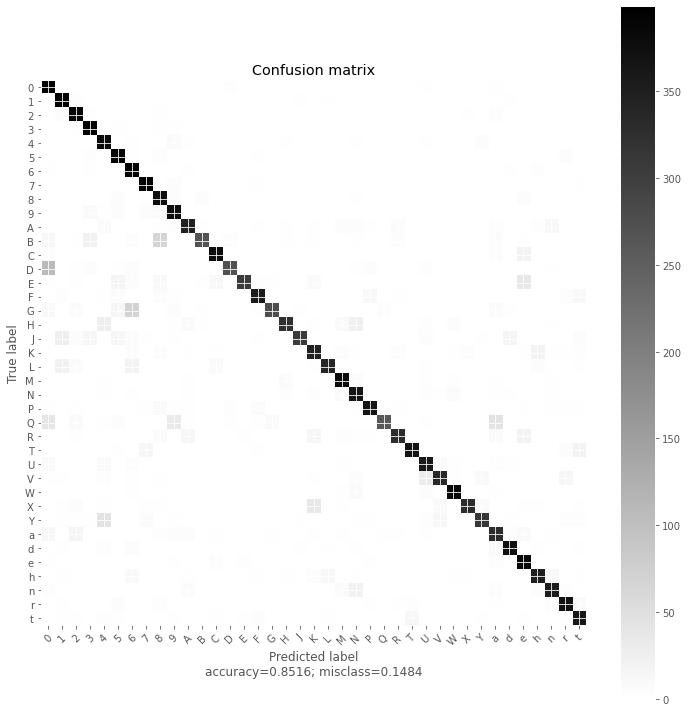

In [32]:
test_merged_balanced, _ = balance_dataset(test_merged, "Merge")
testX_merged_balanced = test_merged_balanced[test_merged_balanced.columns[2:]].to_numpy(
)
testY_merged_balanced = test_merged_balanced["Merge"].to_numpy()
predictY_merged_balanced = model_merge.predict(testX_merged_balanced)
predictY_merged_balanced = lb2.inverse_transform(predictY_merged_balanced)
confusion_merged_balanced = sklearn.metrics.confusion_matrix(
    testY_merged_balanced, predictY_merged_balanced)
plot_confusion_matrix(confusion_merged_balanced, [
                      chr(i) for i in map_char_merged])

In [33]:
train_merged["Merge"].value_counts().rename(lambda x: chr(map_char_merged[x]))

1    68363
0    62317
5    54879
9    40528
2    39629
6    39391
7    35754
3    35143
8    33946
4    33535
e    24631
t    18262
U    15432
r    14105
C    12948
F    11743
M    11647
n    11418
P    10795
d    10177
a    10033
T     9820
h     8738
N     8237
V     7547
W     7392
Y     7108
A     6407
J     5658
X     5593
L     5076
R     5073
K     4959
E     4934
D     4562
B     3878
H     3152
Q     2605
G     2517
Name: Merge, dtype: int64

As seen in the confusion matrix, since there are more digits than letters, the model tends to misclassifying other letters as numbers (as show on the balanced confusion matrix, more dark square on digits as prediction columns).  
We proceed to balance the merged training dataset, hopefully we will get a better result from this. Balancing will only be done on training set, removed training data will be moved into testing set and then the testing set will also be balanced.

In [15]:
train_merged_balanced, train_merged_removed = balance_dataset(
    train_merged, "Merge")
test_merged = test_merged.append(train_merged_removed)
test_merged_balanced, _ = balance_dataset(test_merged, "Merge")
train_merged_balanced.to_csv(
    "./dataset/emnist-newmerge-balanced-train.csv", header=False, index=False)
test_merged_balanced.to_csv(
    "./dataset/emnist-newmerge-balanced-test.csv", header=False, index=False)
map_char_merged.to_csv(
    "./dataset/emnist-newmerge-balanced-mapping.txt", header=False)

In [99]:
# Reset all variables to clear memory
%reset
# Run all import and function def again
# Run import cell
# build_model, plot_confusion_matrix

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [45]:
# data structure: col 0: original class, col 1: merged class, col [2:end] : pixels/image data
train = pd.read_csv("./dataset/emnist-newmerge-balanced-train.csv",
                    header=None, dtype=np.uint8)
test = pd.read_csv("./dataset/emnist-newmerge-balanced-test.csv",
                   header=None, dtype=np.uint8)
map_char = pd.read_csv("./dataset/emnist-newmerge-balanced-mapping.txt",
                       index_col=0, header=None, squeeze=True, dtype=np.uint8)

In [30]:
model = build_model([784, 256, 39], "sigmoid")

In [46]:
trainX = train[train.columns[2:]].to_numpy()
trainY = train[1].to_numpy()
testX = test[test.columns[2:]].to_numpy()
testY = test[1].to_numpy()
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [59]:
H = model.fit(trainX, trainY, validation_data=(
    testX, testY), epochs=30, batch_size=1024)

Epoch 1/30
96/96 [==============================] - 1s 7ms/step - loss: 0.5677 - accuracy: 0.8408 - val_loss: 0.6050 - val_accuracy: 0.8332
Epoch 2/30
96/96 [==============================] - 1s 7ms/step - loss: 0.5531 - accuracy: 0.8456 - val_loss: 0.5946 - val_accuracy: 0.8389
Epoch 3/30
96/96 [==============================] - 1s 7ms/step - loss: 0.5416 - accuracy: 0.8490 - val_loss: 0.5878 - val_accuracy: 0.8373
Epoch 4/30
96/96 [==============================] - 1s 7ms/step - loss: 0.5341 - accuracy: 0.8498 - val_loss: 0.5814 - val_accuracy: 0.8386
Epoch 5/30
96/96 [==============================] - 1s 7ms/step - loss: 0.5248 - accuracy: 0.8531 - val_loss: 0.5780 - val_accuracy: 0.8423
Epoch 6/30
96/96 [==============================] - 1s 7ms/step - loss: 0.5187 - accuracy: 0.8548 - val_loss: 0.5702 - val_accuracy: 0.8434
Epoch 7/30
96/96 [==============================] - 1s 7ms/step - loss: 0.5123 - accuracy: 0.8571 - val_loss: 0.5675 - val_accuracy: 0.8429
Epoch 8/30
96/96 [==

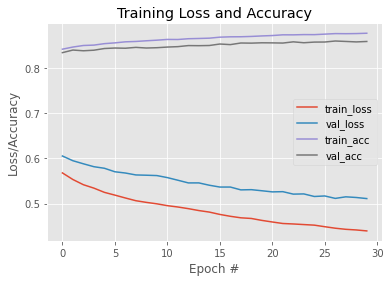

In [60]:
epoch = 30
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epoch), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epoch), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epoch), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epoch), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [61]:
print("######## CLASSIFICATION RESULTS FOR TRAINING DATA ########")
print(classification_report(lb.inverse_transform(trainY), lb.inverse_transform(
    model.predict(trainX)), target_names=[chr(i) for i in map_char]))
print("######## CLASSIFICATION RESULTS FOR TESTING DATA ########")
print(classification_report(lb.inverse_transform(testY), lb.inverse_transform(
    model.predict(testX)), target_names=[chr(i) for i in map_char]))

######## CLASSIFICATION RESULTS FOR TRAINING DATA ########
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2517
           1       0.93      0.94      0.93      2517
           2       0.90      0.90      0.90      2517
           3       0.92      0.92      0.92      2517
           4       0.85      0.85      0.85      2517
           5       0.90      0.88      0.89      2517
           6       0.88      0.88      0.88      2517
           7       0.94      0.93      0.94      2517
           8       0.86      0.82      0.84      2517
           9       0.88      0.86      0.87      2517
           A       0.84      0.88      0.86      2517
           B       0.81      0.86      0.84      2517
           C       0.90      0.86      0.88      2517
           D       0.88      0.87      0.87      2517
           E       0.90      0.87      0.89      2517
           F       0.89      0.84      0.86      2517
           G       0.8

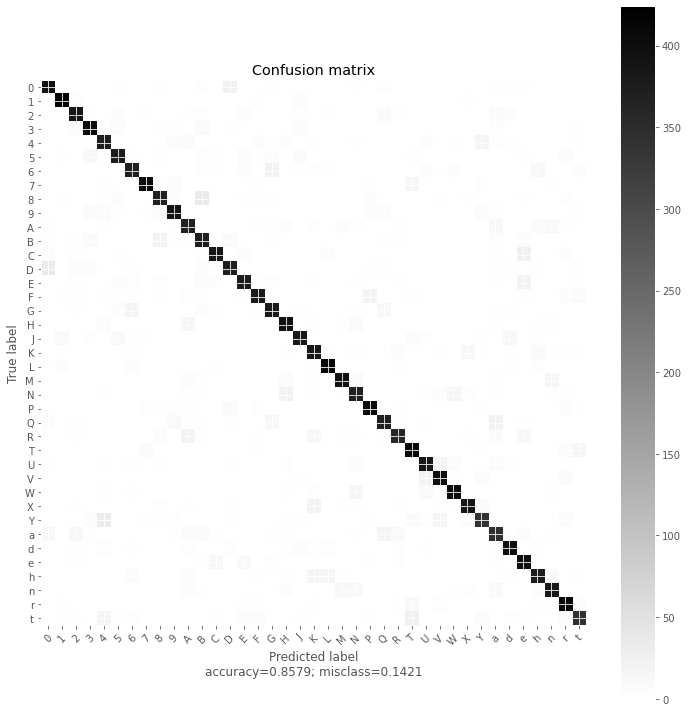

In [62]:
confusion = sklearn.metrics.confusion_matrix(
    lb.inverse_transform(testY), lb.inverse_transform(model.predict(testX)))
plot_confusion_matrix(confusion, [chr(i) for i in map_char])

The decrease in accuracy is expected due to massively reduced number of sample size, but note that the high accuracy can also due to the old model with old data aggressively fitting classes with high number of data points. In following up sections we will proceed to improve the accuracy using other preprocessing means and hypertuning the model.  
However, from the confusion matrix, there are no cluster of misclassification due to overfitting one class, and misclass distribution on the matrix can be described as white noise (due to bad handwriting? or more reasons?). We can conclude that the merging and balancing is a success and will start using these dataset from now.

Sidenote: from the new matrix we can see there are some misclassification that could be due to similar handwriting: D and 0, G and 6, etc. However, since the intensity is similar to that of other misclass we will stop merging here to avoid overly aggressive in balancing and merging data.

## Topological Data Analysis (TDA) - Persistent Homology

We used `giotto-tda` library for Persistent Homology preprocessing

In [4]:
# install gtda from "pip install -U giotto-tda"
from sklearn.pipeline import make_pipeline, make_union
from gtda.diagrams import PersistenceEntropy
from gtda.images import HeightFiltration
from sklearn.pipeline import Pipeline
from gtda.diagrams import Amplitude
from gtda.diagrams import HeatKernel
from gtda.diagrams import Scaler
from gtda.homology import CubicalPersistence
from gtda.images import RadialFiltration
from gtda.images import Binarizer
from sklearn.model_selection import train_test_split
import time

In [5]:
direction_list = [[1, 0], [1, 1], [0, 1],
                  [-1, 1], [-1, 0], [-1, -1], [0, -1], [1, -1]]

center_list = [
    [13, 6],
    [6, 13],
    [13, 13],
    [20, 13],
    [13, 20],
    [6, 6],
    [6, 20],
    [20, 6],
    [20, 20],
]

# Creating a list of all filtration transformer, we will be applying
filtration_list = (
    [
        HeightFiltration(direction=np.array(direction), n_jobs=-1)
        for direction in direction_list
    ]
    + [RadialFiltration(center=np.array(center), n_jobs=-1)
       for center in center_list]
)

# Creating the diagram generation pipeline
diagram_steps = [
    [
        Binarizer(threshold=0.4, n_jobs=-1),
        filtration,
        CubicalPersistence(n_jobs=-1),
        Scaler(n_jobs=-1),
    ]
    for filtration in filtration_list
]

# Listing all metrics we want to use to extract diagram amplitudes
metric_list = [
    {"metric": "bottleneck", "metric_params": {}},
    {"metric": "wasserstein", "metric_params": {"p": 1}},
    {"metric": "wasserstein", "metric_params": {"p": 2}},
    {"metric": "landscape", "metric_params": {
        "p": 1, "n_layers": 1, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {
        "p": 1, "n_layers": 2, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {
        "p": 2, "n_layers": 1, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {
        "p": 2, "n_layers": 2, "n_bins": 100}},
    {"metric": "betti", "metric_params": {"p": 1, "n_bins": 100}},
    {"metric": "betti", "metric_params": {"p": 2, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 1, "sigma": 1.6, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 1, "sigma": 3.2, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 2, "sigma": 1.6, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 2, "sigma": 3.2, "n_bins": 100}},
]

#
feature_union = make_union(
    *[PersistenceEntropy()]  # nan_fill_value=-1
    + [Amplitude(**metric, n_jobs=-1, order=None) for metric in metric_list]
)

tda_union = make_union(
    *[make_pipeline(*diagram_step, feature_union)
      for diagram_step in diagram_steps],
    n_jobs=-1
)

In [23]:
# start = time.time()
# X_train_tda_prep = trainX.reshape(trainX.shape[0],28,28)
# X_train_tda_prep = np.array_split(X_train_tda_prep,1000)
# X_train_tda = tda_union.fit_transform(X_train_tda_prep[0])
# for batches in X_train_tda_prep[1:]:
#     X_train_tda_new = tda_union.fit_transform(batches)
#     X_train_tda = np.concatenate((X_train_tda,X_train_tda_new))
# np.save("trainX_TDA", X_train_tda)

# X_test_tda_prep = testX.reshape(testX.shape[0],28,28)
# X_test_tda_prep = np.array_split(X_test_tda_prep,100)
# X_test_tda = tda_union.fit_transform(X_test_tda_prep[0])
# for batches in X_test_tda_prep[1:]:
#     X_test_tda_new = tda_union.fit_transform(batches)
#     X_test_tda = np.concatenate((X_test_tda,X_test_tda_new))
# np.save("testX_TDA", X_test_tda)

# end = time.time() - start
# print("Preprocessing time is {} seconds".format(end))

In [47]:
# loading the TDA data
trainX_tda = np.load("./dataset/trainX_TDA.npy")
testX_tda = np.load("./dataset/testX_TDA.npy")

In [48]:
# preprocessing the data, there are some NaN.
nandrop = np.isnan(trainX_tda).any(axis=1)
trainX_tda = trainX_tda[~nandrop]
trainY_dropnan = trainY[~nandrop]

nandrop = np.isnan(testX_tda).any(axis=1)
testX_tda = testX_tda[~nandrop]
testY_dropnan = testY[~nandrop]

In [53]:
class FreqPrint(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 9:
            print("Epoch {:4} - loss: {:.4f} - accuracy: {:.2f}% - val_loss: {:.4f} - val_accuracy: {:.2f}%".format(
                epoch+1, logs["loss"], logs["accuracy"]*100, logs["val_loss"], logs["val_accuracy"]*100))

In [54]:
# layers, acf="relu", loss_func="categorical_crossentropy", l1_lambda=0, l2_lambda=0, opt="adam"
model_tda = build_model([trainX_tda.shape[1], 256, 39], "sigmoid")
H_tda = model_tda.fit(trainX_tda, trainY_dropnan, validation_data=(
    testX_tda, testY_dropnan), epochs=100, shuffle=True, batch_size=512, verbose=0, callbacks=[FreqPrint()])

Epoch   10 - loss: 0.4812 - accuracy: 87.44% - val_loss: 0.5043 - val_accuracy: 86.30%
Epoch   20 - loss: 0.3439 - accuracy: 90.90% - val_loss: 0.4333 - val_accuracy: 87.29%
Epoch   30 - loss: 0.2882 - accuracy: 92.33% - val_loss: 0.3744 - val_accuracy: 89.12%
Epoch   40 - loss: 0.2510 - accuracy: 93.31% - val_loss: 0.3629 - val_accuracy: 89.16%
Epoch   50 - loss: 0.2276 - accuracy: 93.91% - val_loss: 0.3701 - val_accuracy: 88.75%
Epoch   60 - loss: 0.2120 - accuracy: 94.34% - val_loss: 0.3652 - val_accuracy: 89.12%
Epoch   70 - loss: 0.1973 - accuracy: 94.71% - val_loss: 0.3697 - val_accuracy: 89.23%
Epoch   80 - loss: 0.1864 - accuracy: 94.94% - val_loss: 0.3724 - val_accuracy: 89.30%
Epoch   90 - loss: 0.1766 - accuracy: 95.23% - val_loss: 0.3936 - val_accuracy: 88.67%
Epoch  100 - loss: 0.1662 - accuracy: 95.52% - val_loss: 0.3580 - val_accuracy: 89.20%


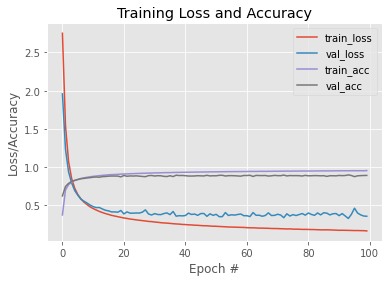

In [55]:
epoch = 100
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epoch), H_tda.history["loss"], label="train_loss")
plt.plot(np.arange(0, epoch), H_tda.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epoch), H_tda.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epoch), H_tda.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

After 100 epoch the training accuracy reached 95% while testing accuracy stayed the same at 89%, hinted at some overfitting of the model training.

## Principal Component Analysis (PCA)

Before moving towards hyperparameters tuning we'll use PCA to reduce the dimension of the dataset. In a paper about using TDA to classify MNIST [(Garin & Tauzin, 2019)](https://arxiv.org/abs/1910.08345), after transforming the data using TDA, the authors manually chose the features based off correlation matrix to get a better classification result.  
Based on this study, we decided to use PCA on the data as an automatic way to reduce the dimension/choosing features from the TDA dataset.

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA(random_state=1)
pca.fit(trainX_tda)

PCA(random_state=1)

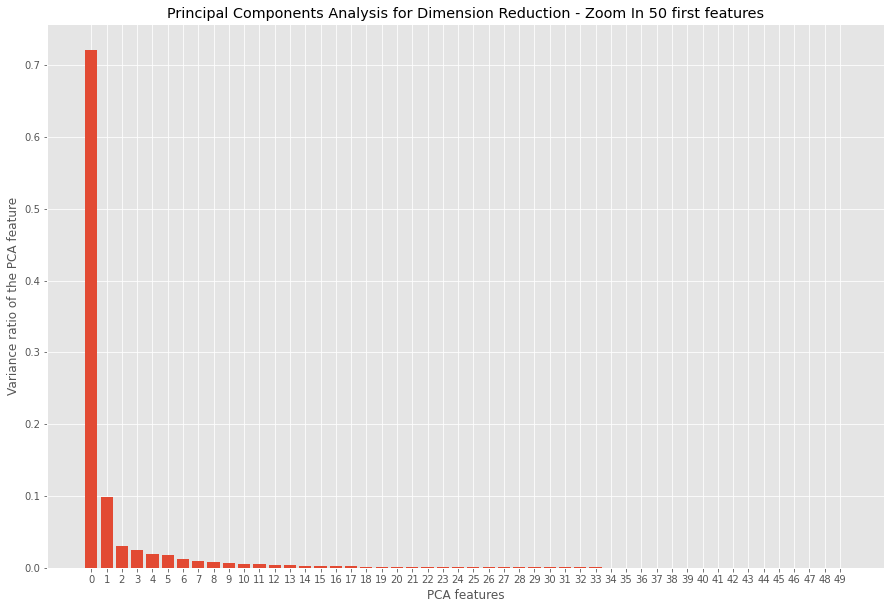

In [72]:
l = 50
x = range(l)
plt.figure(figsize=(15, 10))
plt.bar(x, pca.explained_variance_ratio_[:l])
plt.xticks(x)
plt.title('Principal Components Analysis for Dimension Reduction - Zoom In {} first features'.format(l))
plt.xlabel('PCA features')
plt.ylabel('Variance ratio of the PCA feature')
plt.show()

We can see that after 33 PCA features, the ratio of variance explained by other features are negligible. We proceed to find the number of features to get 99% of variance

In [73]:
def get_n_components(pca_var_ratio, threshold, n_threshold=100):
    n = 0
    var_ratio_sum = 0
    for var_ratio in pca_var_ratio:
        var_ratio_sum += var_ratio
        n += 1
        if var_ratio_sum > threshold or n == n_threshold:
            break
    return n


n_99 = get_n_components(pca.explained_variance_ratio_, 0.99)
n_95 = get_n_components(pca.explained_variance_ratio_, 0.95)
n_90 = get_n_components(pca.explained_variance_ratio_, 0.90)
print(n_99, n_95, n_90)

35 11 6


With 6 features we get 90% of variances, for 11 we get 95% and for 35 we get 99%. Regardless of n chosen this is still a massive reduction from 476 features generated from TDA. Hopefully this will boost the processing speed (and maybe increase accuracy?). 

Reading some Kaggle Notebooks about PCA on MNIST (not EMNIST) (Sources:
[[1]](https://www.kaggle.com/sflender/comparing-random-forest-pca-and-knn)
[[2]](https://www.kaggle.com/blurredmachine/mnist-classification-eda-pca-cnn-99-7-score)
[[3]](https://www.kaggle.com/damienbeneschi/mnist-eda-preprocessing-classifiers)
[[4]](https://www.kaggle.com/ddmngml/pca-and-svm-on-mnist-dataset)
), after 10 features the usual cumulative variance explained ratio is 50%, and only after 80 features PCA can get 90% of variances. With EMNIST, the number of features needed for 90% PCA would definitely increased (since there are more independent variances with letters and numbers in the same dataset). However, with preprocessing by TDA, we only need 6 features to get 90% of the variances.

We continue by choosing n = 35 for 99% variance.

In [84]:
pca = PCA(n_components=n_99, random_state=1)
trainX_tda = pca.fit_transform(trainX_tda)
testX_tda = pca.transform(testX_tda)

In [87]:
model_tda = build_model([trainX_tda.shape[1], 256, 39], "sigmoid")
H_tda = model_tda.fit(trainX_tda, trainY_dropnan, validation_data=(
    testX_tda, testY_dropnan), epochs=100, shuffle=True, batch_size=512)

Epoch 1/100
192/192 [==============================] - 0s 2ms/step - loss: 2.8242 - accuracy: 0.4339 - val_loss: 1.9648 - val_accuracy: 0.6783
Epoch 2/100
192/192 [==============================] - 0s 2ms/step - loss: 1.4314 - accuracy: 0.7556 - val_loss: 1.0636 - val_accuracy: 0.7937
Epoch 3/100
192/192 [==============================] - 0s 2ms/step - loss: 0.8822 - accuracy: 0.8169 - val_loss: 0.7620 - val_accuracy: 0.8307
Epoch 4/100
192/192 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.8423 - val_loss: 0.6342 - val_accuracy: 0.8476
Epoch 5/100
192/192 [==============================] - 0s 2ms/step - loss: 0.5748 - accuracy: 0.8588 - val_loss: 0.5659 - val_accuracy: 0.8578
Epoch 6/100
192/192 [==============================] - 0s 2ms/step - loss: 0.5149 - accuracy: 0.8698 - val_loss: 0.5242 - val_accuracy: 0.8631
Epoch 7/100
192/192 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.8771 - val_loss: 0.4968 - val_accuracy: 0.8672

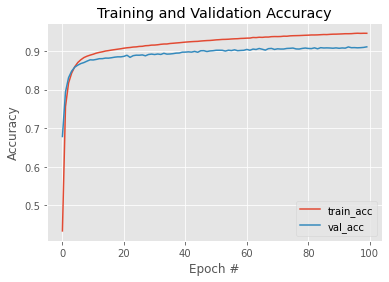

In [90]:
epoch = 100
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epoch), H_tda.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epoch), H_tda.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()

We increased our testing accuracy from 89% to 91%, while training accuracy only reduced from 95% to 94%. PCA helps removing components that are not relevant to the classification problem and also reduces the problem of overfitting.

In [91]:
np.save("trainX_tda_PCA_35", trainX_tda)
np.save("testX_tda_PCA_35", testX_tda)

# Neural Network tuning
***

We ran Random Forest on the dataset (EMNIST, merged, balanced, TDA, PCA) and got 85% classification score on average (`sklearn.ensemble.RandomForestClassifier` with `fit` for training data then `score` and `predict`). The code wasn't show here since we ran it independently with this notebook and the process takes a long time.

In [6]:
# Reset all variables to clear memory
%reset
# Run all import and function def again
# Run import cell
# build_model, plot_confusion_matrix, dataset emnist-newmerge-balanced
# load tda data and remove NaN

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [58]:
# Loading original image data in case we need to draw some misclass cases
trainX_image = train[train.columns[2:]].to_numpy()
testX_image = test[test.columns[2:]].to_numpy()

# Loading the PCA data and the corresponding training label
trainX = np.load("./dataset/trainX_tda_PCA_35.npy")
trainY = trainY_dropnan
testX = np.load("./dataset/testX_tda_PCA_35.npy")
testY = testY_dropnan

## Baseline

| Hyper Parameter                  | Value                    |
| -------------------------------- | ------------------------ |
| **Model Defined**                |                          |
| Architecture (hidden layers)     | [input,256,output]       |
| Activation Function              | Sigmoid                  |
| Loss Function                    | Categorical Crossentropy |
| $L_1$ Regularization $\lambda_1$ | 0                        |
| $L_2$ Regularization $\lambda_2$ | 0                        |
| **Optimizer**                    | Adam                     |
| Learning Rate                    | 0.001 (default)          |
| **Fit Function**                 |                          |
| Shuffle Data                     | True                     |
| Batch Size                       | 512                      |
| Epoch                            | 100                      |
| **Other Informations**           |                          |
| Weight Initialization            | Glorot Uniform (default) |
| Preprocessing Methods            | Merge, Balance, TDA, PCA |

In [26]:
model_baseline = build_model([trainX.shape[1], 256, 39], "sigmoid")
H_baseline = model_baseline.fit(trainX, trainY, validation_data=(
    testX, testY), epochs=100, shuffle=True, batch_size=512)

Epoch 1/100
192/192 [==============================] - 0s 2ms/step - loss: 2.8502 - accuracy: 0.4464 - val_loss: 1.9934 - val_accuracy: 0.7026
Epoch 2/100
192/192 [==============================] - 0s 2ms/step - loss: 1.4479 - accuracy: 0.7560 - val_loss: 1.0731 - val_accuracy: 0.7930
Epoch 3/100
192/192 [==============================] - 0s 2ms/step - loss: 0.8877 - accuracy: 0.8155 - val_loss: 0.7670 - val_accuracy: 0.8306
Epoch 4/100
192/192 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.8427 - val_loss: 0.6366 - val_accuracy: 0.8475
Epoch 5/100
192/192 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.8587 - val_loss: 0.5650 - val_accuracy: 0.8588
Epoch 6/100
192/192 [==============================] - 0s 2ms/step - loss: 0.5166 - accuracy: 0.8697 - val_loss: 0.5226 - val_accuracy: 0.8662
Epoch 7/100
192/192 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.8771 - val_loss: 0.4957 - val_accuracy: 0.8680

In [59]:
trainX.shape[1]

35

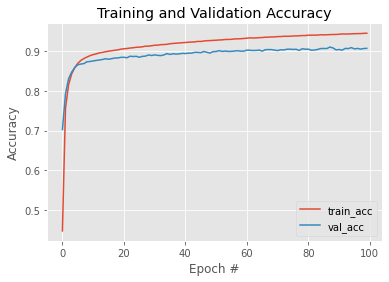

In [30]:
epoch = 100
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epoch), H_baseline.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epoch), H_baseline.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend();

In [55]:
predictY_baseline = lb.inverse_transform(model_baseline.predict(testX))
print(classification_report(lb.inverse_transform(testY),predictY_baseline, target_names=[chr(i) for i in map_char]))

              precision    recall  f1-score   support

           0       0.94      0.59      0.72       447
           1       0.96      0.95      0.96       447
           2       0.95      0.91      0.93       447
           3       0.96      0.95      0.96       447
           4       0.96      0.89      0.92       447
           5       0.92      0.94      0.93       447
           6       0.94      0.95      0.94       447
           7       0.97      0.93      0.95       447
           8       0.95      0.70      0.81       447
           9       0.90      0.90      0.90       447
           A       0.90      0.91      0.90       447
           B       0.74      0.91      0.82       447
           C       0.88      0.96      0.92       447
           D       0.75      0.96      0.84       447
           E       0.92      0.93      0.93       447
           F       0.93      0.91      0.92       447
           G       0.92      0.91      0.92       447
           H       0.88    

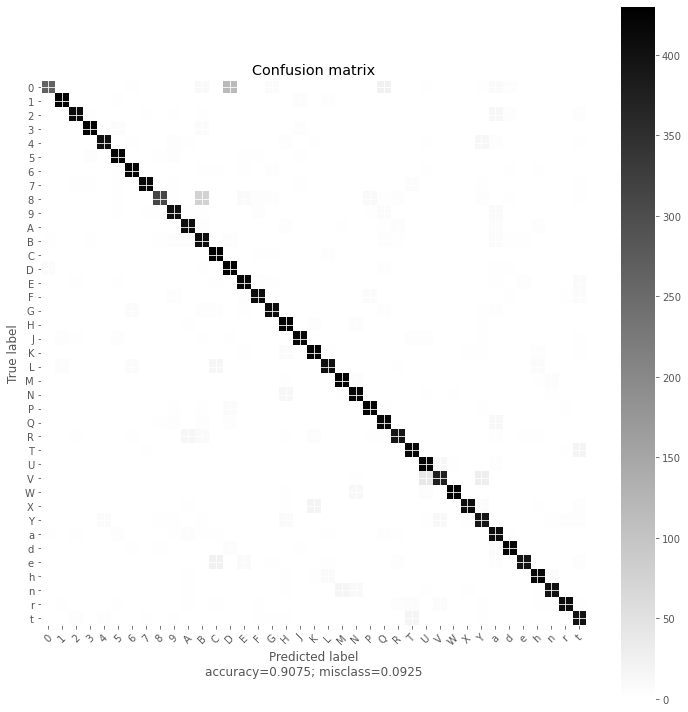

In [56]:
confusion = sklearn.metrics.confusion_matrix(
    lb.inverse_transform(testY), predictY_baseline)
plot_confusion_matrix(confusion, [chr(i) for i in map_char])

We can see from Confusion Matrix, most of prediction misclass are from the model classified some 0 as D and some 8 as B, which makes sense if we refer this back to similar handwriting problem posed in Merging and Balancing section above. However, remerging and Balancing would lose us more data and will complicate the future local classification (classify merged similar texts) more complex

## Adding layers

Since the testing and training results already converged in baseline with sigmoid activation function there's no need to change it.  
Adding more layers can hopefully increase the accuracy

| Hyper Parameter                  | Value                    |
| -------------------------------- | ------------------------ |
| **Model Defined**                |                          |
| Architecture (hidden layers)     | [input,476,256,64,output]       |
| Activation Function              | Sigmoid                  |
| Loss Function                    | Categorical Crossentropy |
| $L_1$ Regularization $\lambda_1$ | 0                        |
| $L_2$ Regularization $\lambda_2$ | 0                        |
| **Optimizer**                    | Adam                     |
| Learning Rate                    | 0.001 (default)          |

In [28]:
model = build_model([trainX.shape[1],476, 256,64, 39], "sigmoid")
H = model.fit(trainX, trainY, validation_data=(
    testX, testY), epochs=100, shuffle=True, batch_size=512)

Epoch 1/100
192/192 [==============================] - 1s 4ms/step - loss: 3.2558 - accuracy: 0.1352 - val_loss: 2.6595 - val_accuracy: 0.3821
Epoch 2/100
192/192 [==============================] - 1s 4ms/step - loss: 2.0644 - accuracy: 0.5320 - val_loss: 1.6105 - val_accuracy: 0.6532
Epoch 3/100
192/192 [==============================] - 1s 4ms/step - loss: 1.3381 - accuracy: 0.7107 - val_loss: 1.1275 - val_accuracy: 0.7457
Epoch 4/100
192/192 [==============================] - 1s 4ms/step - loss: 0.9862 - accuracy: 0.7715 - val_loss: 0.9000 - val_accuracy: 0.7785
Epoch 5/100
192/192 [==============================] - 1s 4ms/step - loss: 0.8026 - accuracy: 0.8026 - val_loss: 0.7741 - val_accuracy: 0.8013
Epoch 6/100
192/192 [==============================] - 1s 4ms/step - loss: 0.6858 - accuracy: 0.8252 - val_loss: 0.6711 - val_accuracy: 0.8240
Epoch 7/100
192/192 [==============================] - 1s 4ms/step - loss: 0.6046 - accuracy: 0.8433 - val_loss: 0.6040 - val_accuracy: 0.8407

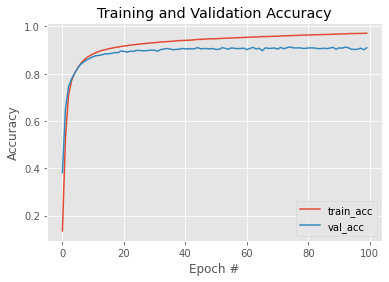

In [29]:
epoch = 100
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epoch), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epoch), H.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend();

We increased the training accuracy from 94% to 97% by adding 2 layers, while the testing accuracy didn't change (90%-91%). The additional processing time is noticeable, but the total runtime is under 3 minutes so still managable.  
In both cases the training/testing accuracy graph showed that there are some degree of overfitting. We'll try regularization for the model.

## Regularization

| Hyper Parameter                  | Value                    |
| -------------------------------- | ------------------------ |
| **Model Defined**                |                          |
| Architecture (hidden layers)     | [input,476,256,64,output]       |
| Activation Function              | Sigmoid                  |
| Loss Function                    | Categorical Crossentropy |
| $L_1$ Regularization $\lambda_1$ | 0.00001                        |
| $L_2$ Regularization $\lambda_2$ | 0                        |
| **Optimizer**                    | Adam                     |
| Learning Rate                    | 0.001 (default)          |

Epoch 1/100
192/192 [==============================] - 1s 5ms/step - loss: 3.3866 - accuracy: 0.0790 - val_loss: 3.0345 - val_accuracy: 0.1432
Epoch 2/100
192/192 [==============================] - 1s 5ms/step - loss: 2.5614 - accuracy: 0.3397 - val_loss: 2.0747 - val_accuracy: 0.5156
Epoch 3/100
192/192 [==============================] - 1s 4ms/step - loss: 1.8054 - accuracy: 0.5802 - val_loss: 1.5783 - val_accuracy: 0.6390
Epoch 4/100
192/192 [==============================] - 1s 4ms/step - loss: 1.4213 - accuracy: 0.6774 - val_loss: 1.2888 - val_accuracy: 0.7065
Epoch 5/100
192/192 [==============================] - 1s 4ms/step - loss: 1.1924 - accuracy: 0.7275 - val_loss: 1.1142 - val_accuracy: 0.7474
Epoch 6/100
192/192 [==============================] - 1s 4ms/step - loss: 1.0506 - accuracy: 0.7578 - val_loss: 1.0129 - val_accuracy: 0.7633
Epoch 7/100
192/192 [==============================] - 1s 4ms/step - loss: 0.9520 - accuracy: 0.7796 - val_loss: 0.9274 - val_accuracy: 0.7835

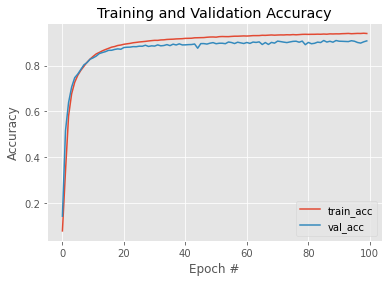

In [36]:
model = build_model([trainX.shape[1],476, 256,64, 39], "sigmoid",l1_lambda=0.00001)
H = model.fit(trainX, trainY, validation_data=(
    testX, testY), epochs=100, shuffle=True, batch_size=512)
epoch = 100
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epoch), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epoch), H.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend();

$L_1$ regularization doesn't help with overfitting while decreasing the training accuracy, which can be explained as all PCA features chosen are essential for the training of the model, and there are no "useless" features/datapoint that will allows some neurons/nodes to be turned off by $L_1$ regularization. Also, larger $\lambda_1$ (not showed here) would make the model converge slower while still exhibiting overfitting.  We'll not be using this for the upcoming tuning

| Hyper Parameter                  | Value                    |
| -------------------------------- | ------------------------ |
| **Model Defined**                |                          |
| Architecture (hidden layers)     | [input,476,256,64,output]       |
| Activation Function              | Sigmoid                  |
| Loss Function                    | Categorical Crossentropy |
| $L_1$ Regularization $\lambda_1$ | 0                        |
| $L_2$ Regularization $\lambda_2$ | 0.00001                        |
| **Optimizer**                    | Adam                     |
| Learning Rate                    | 0.001 (default)          |

From multiple tests: Any larger $\lambda_2$ will massively slow down the convergence rate of the model, while smaller $\lambda_2$ will have less effect on the regularization of the weight (less effective in prevent the weight from getting too large)

Epoch 1/100
192/192 [==============================] - 1s 5ms/step - loss: 3.2539 - accuracy: 0.1210 - val_loss: 2.7134 - val_accuracy: 0.2944
Epoch 2/100
192/192 [==============================] - 1s 4ms/step - loss: 2.1559 - accuracy: 0.4900 - val_loss: 1.6885 - val_accuracy: 0.6305
Epoch 3/100
192/192 [==============================] - 1s 4ms/step - loss: 1.3959 - accuracy: 0.6989 - val_loss: 1.1821 - val_accuracy: 0.7400
Epoch 4/100
192/192 [==============================] - 1s 5ms/step - loss: 1.0254 - accuracy: 0.7717 - val_loss: 0.9265 - val_accuracy: 0.7864
Epoch 5/100
192/192 [==============================] - 1s 4ms/step - loss: 0.8410 - accuracy: 0.8036 - val_loss: 0.7913 - val_accuracy: 0.8119
Epoch 6/100
192/192 [==============================] - 1s 4ms/step - loss: 0.7295 - accuracy: 0.8252 - val_loss: 0.7065 - val_accuracy: 0.8273
Epoch 7/100
192/192 [==============================] - 1s 4ms/step - loss: 0.6513 - accuracy: 0.8415 - val_loss: 0.6501 - val_accuracy: 0.8406

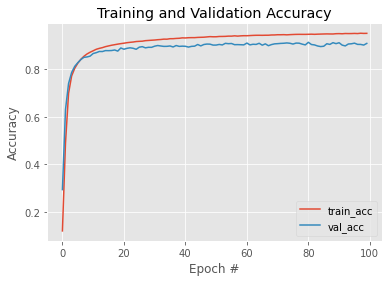

In [69]:
model = build_model([trainX.shape[1],476, 256,64, 39], "sigmoid",l2_lambda=0.00001)
H = model.fit(trainX, trainY, validation_data=(
    testX, testY), epochs=100, shuffle=True, batch_size=512)
epoch = 100
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epoch), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epoch), H.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend();

$L_2$ regularization does not help with the problem of overfitting, while also decreased the training accuracy

# Conclusion

In this project, we examined different preprocessing techniques, dimension reduction methods while also solving some problem with training on EMNIST dataset. We were able to classify EMNIST (merged and balanced using our own methodology) using 22 times less features than the original dimension, while also increasing the classification accuracy and improve the model training time.
After hyperparameter tuning, the optimal network architecture is as follow:

| Hyper Parameter                  | Value                    |
| -------------------------------- | ------------------------ |
| **Model Defined**                |                          |
| Architecture (hidden layers)     | [35,476,256,64,39]       |
| Activation Function              | Sigmoid                  |
| Loss Function                    | Categorical Crossentropy |
| $L_1$ Regularization $\lambda_1$ | 0                        |
| $L_2$ Regularization $\lambda_2$ | 0                        |
| **Optimizer**                    | Adam                     |
| Learning Rate                    | 0.001 (default)          |
| **Fit Function**                 |                          |
| Shuffle Data                     | True                     |
| Batch Size                       | 512                      |
| Epoch                            | 100                      |
| **Other Informations**           |                          |
| Weight Initialization            | Glorot Uniform (default) |
| Preprocessing Methods            | Merge, Balance, TDA, PCA |

The neural network gave 97% training accuracy and 90% testing accuracy.

In the future we can improve the classification accuracy even more by using Convolution Neural Networks (which was proven to be very effective with image data), while also still applying TDA for feature extraction/dimension reduction.
Another future research direction is to work on local classification of the merged class introduced in this project, maybe with a different Neural Network architecture, or some combination of image visualization techniques and dimension reduction techniques aside from TDA and PCA.